In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("german.csv")
df.head (10)

,1,6,4,12,5,5.1,3,4.1,1.1,67,...,0,0.1,1.4,0.2,0.3,1.5,0.4,0.5,1.6,1.7
0,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
1,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
2,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
3,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
4,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
5,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
6,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1
7,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,1
8,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,2
9,2,12,2,13,1,2,2,1,3,25,...,1,0,1,0,1,0,0,0,1,2


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
y= y -1
y.head()

0    1
1    0
2    0
3    1
4    0
Name: 1.7, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
def showResult(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

In [7]:
## kNN - DT - RF

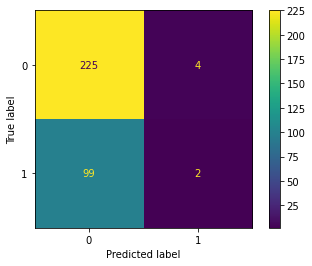

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       229
           1       0.33      0.02      0.04       101

    accuracy                           0.69       330
   macro avg       0.51      0.50      0.43       330
weighted avg       0.58      0.69      0.58       330



In [8]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(random_state=0))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(n_estimators=10, random_state=42)
)

showResult(clf, X_train, y_train, X_test, y_test)

In [9]:
## kNN - RF - DT

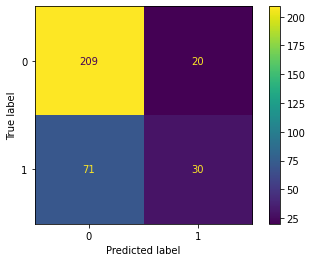

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       229
           1       0.60      0.30      0.40       101

    accuracy                           0.72       330
   macro avg       0.67      0.60      0.61       330
weighted avg       0.70      0.72      0.69       330



In [10]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= DecisionTreeClassifier(random_state=0)
)

showResult(clf, X_train, y_train, X_test, y_test)

In [11]:
## DT - RF - kNN

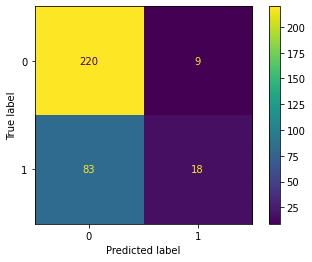

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       229
           1       0.67      0.18      0.28       101

    accuracy                           0.72       330
   macro avg       0.70      0.57      0.55       330
weighted avg       0.71      0.72      0.66       330



In [12]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= KNeighborsClassifier(n_neighbors=3)
)

showResult(clf, X_train, y_train, X_test, y_test)